In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from data_loader import load_sector_data

In [4]:
kospi = load_sector_data('KOSPI')
kosdaq = load_sector_data('KOSDAQ')
etf = load_sector_data('ETF')

1개월 간의 data를 불러옵니다.
1개월 간의 data를 불러옵니다.
1개월 간의 data를 불러옵니다.


In [5]:
kospi['market'] = 'KOSPI'
kosdaq['market'] = 'KOSDAQ'
etf['market'] = 'ETF'

In [6]:
totalstocks = pd.concat([kospi, kosdaq, etf], ignore_index=True)

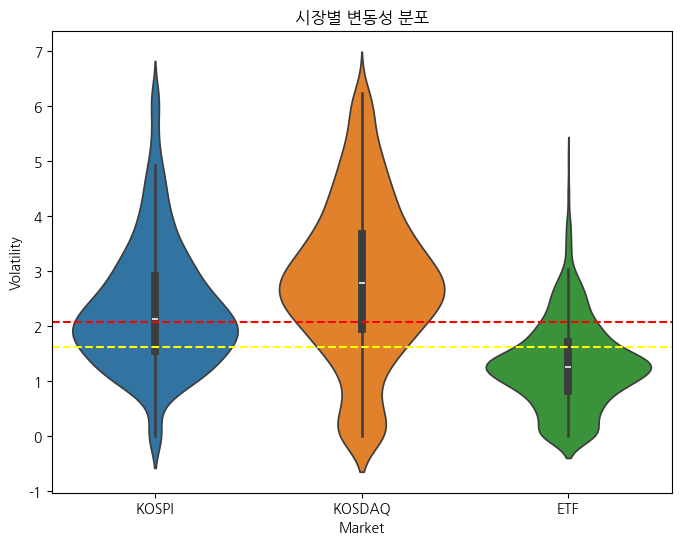

In [7]:
# IQR을 사용하여 이상치 제거
Q1 = totalstocks['Volatility'].quantile(0.25)
Q3 = totalstocks['Volatility'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

kosdaq_25 = totalstocks[totalstocks['market'] == 'KOSDAQ']['Volatility'].quantile(0.25)
kospi_25 = totalstocks[totalstocks['market'] == 'KOSPI']['Volatility'].quantile(0.25)

# 이상치 제거
totalstocks_cleaned = totalstocks[(totalstocks['Volatility'] <= upper_bound)]

plt.figure(figsize=(8, 6))  # 플롯 크기 설정
sns.violinplot(x='market', y='Volatility', data=totalstocks_cleaned, inner='box', linewidth=1.25, hue='market')

# 수평선 추가
plt.axhline(y=kosdaq_25, color='red', linestyle='--', label='kosdaq_25')
plt.axhline(y=kospi_25, color='yellow', linestyle='--', label='kospi_25')

# 제목 설정
plt.title('시장별 변동성 분포')
plt.xlabel('Market')
plt.ylabel('Volatility')

# 플롯 보여주기
plt.show()